In [ ]:
import numpy as np
import matplotlib as plt
import pandas as pd
import torch
from PIL import Image
from torchvision import transforms
import os

from torchvision import models

np.random.seed(42)  #Fix random number generator

In [ ]:
import torch.nn as nn
#device = 'cuda' if torch.cuda.is_available() else 'cpu'

In [ ]:
import skorch

In [ ]:
from skorch import NeuralNetClassifier

In [ ]:
# Kelvyn &  Ben
#parent_path = '/content/drive/MyDrive/Project'

In [ ]:
# Olli
#parent_path = '/content/drive/MyDrive/21FA/Deep Learning/Project'

In [ ]:
parent_path = '/home/ben/Desktop/Data'

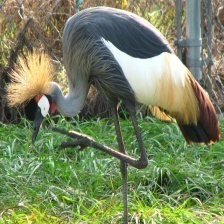

In [ ]:
'''Read the two .csv files'''

class_dict = pd.read_csv(''.join([parent_path,'/class_dict.csv']))
paths = pd.read_csv(''.join([parent_path,'/Bird Species.csv']))

image = Image.open(''.join([parent_path,'/',paths.iloc[0]['filepaths']]))
trans = transforms.ToTensor()
im = trans(image)
im = transforms.ToPILImage()(im).convert('RGB')
display(im)

In [ ]:
'''Get Images and labels directly from filepath'''

trans = transforms.ToTensor()
y_names = []
ind = 0
max_images = 50000
y = np.zeros((50000),dtype=int)
images = torch.zeros((50000,3,224,224))


In [ ]:
for parentPath in ['test', 'train', 'valid']:
    (_,filedirs,_) = os.walk(''.join([parent_path,'/',parentPath])).__next__()
    for filedirInst in filedirs:
        (_,_,filenames) = os.walk("".join([parent_path,'/',parentPath,'/',filedirInst])).__next__()
        for filenameInst in filenames:
            if np.mod(ind,1000) == 0:
                print(ind,' samples done.')
            images[ind,:,:,:] = trans(Image.open("".join([parent_path,'/',parentPath,'/',filedirInst,'/',filenameInst])))
            y_names.append(filedirInst)
            y[ind] = class_dict[class_dict['class'].str.fullmatch(filedirInst)]['class_index']
            ind += 1
            if ind == max_images:
                break

        if ind == max_images:
          break
    if ind == max_images:
      break

n_samples = ind

0  samples done.
1000  samples done.
2000  samples done.
3000  samples done.
4000  samples done.
5000  samples done.
6000  samples done.
7000  samples done.
8000  samples done.
9000  samples done.
10000  samples done.
11000  samples done.
12000  samples done.
13000  samples done.
14000  samples done.
15000  samples done.
16000  samples done.
17000  samples done.
18000  samples done.
19000  samples done.
20000  samples done.
21000  samples done.
22000  samples done.
23000  samples done.
24000  samples done.
25000  samples done.
26000  samples done.
27000  samples done.
28000  samples done.
29000  samples done.
30000  samples done.
31000  samples done.
32000  samples done.
33000  samples done.
34000  samples done.
35000  samples done.
36000  samples done.
37000  samples done.
38000  samples done.
39000  samples done.
40000  samples done.
41000  samples done.
42000  samples done.
43000  samples done.
44000  samples done.
45000  samples done.
46000  samples done.


In [ ]:
'''Get rid of extra cells'''

y = y[:n_samples]
images = images[:n_samples,:,:,:]

In [ ]:
'''Shuffle the data'''

permInd = np.random.permutation(n_samples)

imagesPerm = images[permInd,:,:,:]
yPerm = y[permInd]


In [ ]:
'''Split between training, validation and test data'''

testSplit = 0.15  #Fraction for test set
validSplit = 0.15 #Fraction for validation set

print(testSplit*100,'%% for test set.')
print(validSplit*100,'%% for validation set.')
print((1-testSplit-validSplit)*100,'%% for training set.')

#First samples for testing, then validation and rest for training
testInd = np.int32(np.ceil(testSplit*n_samples))
validInd = np.int32(testInd + np.ceil(validSplit*n_samples))

yTest = yPerm[:testInd]
yValid = yPerm[testInd:validInd]
yTrain = yPerm[validInd:]

imagesTest = imagesPerm[:testInd,:,:,:]
imagesValid = imagesPerm[testInd:validInd,:,:,:]
imagesTrain = imagesPerm[validInd:,:,:,:]

15.0 %% for test set.
15.0 %% for validation set.
70.0 %% for training set.


In [ ]:
'''Check that all labels are in all test, validation and train sets'''

for ii in np.linspace(0,299,300,dtype=int):
    if not any(ii==yTest):
        print('Not in test set ',ii)
    if not any(ii==yValid):
        print(['Not in validation set ',ii])
    if not any(ii==yTrain):
        print(['Not in train set ',ii])

labelsPerSets = np.zeros((300,3),dtype=int)
for ii in np.linspace(0,299,300,dtype=int):
    labelsPerSets[ii,0] = np.count_nonzero(ii==yTest)
    labelsPerSets[ii,1] = np.count_nonzero(ii==yValid)
    labelsPerSets[ii,2] = np.count_nonzero(ii==yTrain)

print(labelsPerSets)




[[ 31  22  94]
 [ 31  19 100]
 [ 15  26 102]
 [ 25  24 126]
 [ 22  32 135]
 [ 33  24 123]
 [ 31  34 103]
 [ 27  13 103]
 [ 22  21  97]
 [ 25  25 139]
 [ 23  18 108]
 [ 23  28 106]
 [ 20  24 105]
 [ 27  30 103]
 [ 17  22 126]
 [ 22  25 120]
 [ 29  28 113]
 [ 33  19 105]
 [ 23  16 103]
 [ 22  20 105]
 [ 30  23 123]
 [ 24  30 150]
 [ 24  21 131]
 [ 22  21  87]
 [ 22  18  90]
 [ 19  30  93]
 [ 18  13 115]
 [ 27  16 110]
 [ 24  26 120]
 [ 26  26 100]
 [ 19  24 111]
 [ 22  15  98]
 [ 18  31  89]
 [ 19  27 106]
 [ 24  15 102]
 [ 16  18  96]
 [ 18  23  88]
 [ 20  24 115]
 [ 17  21  94]
 [ 21  16 108]
 [ 21  21  94]
 [ 24  22  97]
 [ 14  28 105]
 [ 18  29 131]
 [ 19  24 101]
 [ 21  26 107]
 [ 34  35 126]
 [ 17  32 128]
 [ 24  26 117]
 [ 27  26  86]
 [ 18  21  91]
 [ 21  17  98]
 [ 25  38 124]
 [ 17  15 107]
 [ 28  23 124]
 [ 14  14 102]
 [ 27  18  87]
 [ 24  35 104]
 [ 16  19  95]
 [ 15  19  96]
 [ 25  27 118]
 [ 25  22 108]
 [ 20  23 104]
 [ 16  21 106]
 [ 25  21  85]
 [ 30  31 162]
 [ 13  22 

In [ ]:
model = models.resnet18(pretrained=True)

Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /home/ben/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth


  0%|          | 0.00/44.7M [00:00<?, ?B/s]

In [ ]:
model

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

In [ ]:
model.fc = nn.Linear(512, 300)

In [ ]:
model

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

In [ ]:
device = 'cpu'

In [ ]:
Model = NeuralNetClassifier(
    model,
    max_epochs=20,
    lr=0.0001,
    device=device,
    optimizer=torch.optim.Adam,
    batch_size = 100,
    criterion=torch.nn.CrossEntropyLoss
)

In [ ]:
Model.fit(imagesTrain,yTrain)

  epoch    train_loss    valid_acc    valid_loss        dur
-------  ------------  -----------  ------------  ---------
      1        3.5227       0.7998        1.8093  4186.7289
      2        1.1158       0.8918        0.8371  4198.8747
      3        0.4243       0.9139        0.5721  4193.4159
      4        0.1696       0.9245        0.4571  4188.2194
      5        0.0699       0.9300        0.3948  4199.4158
      6        0.0347       0.9320        0.3624  4208.8977
      7        0.0209       0.9332        0.3450  4194.3268
      8        0.0142       0.9337        0.3350  4208.4629
      9        0.0103       0.9341        0.3280  4221.8982
     10        0.0078       0.9353        0.3228  4204.6138
     11        0.0073       0.9314        0.3253  4210.9427
     12        0.0058       0.9353        0.3143  4212.4703
     13        0.0061       0.9367        0.3109  4206.8970
     14        0.0039       0.9361        0.3105  4213.0251
     15        0.0031       0.9355      

<class 'skorch.classifier.NeuralNetClassifier'>[initialized](
  module_=ResNet(
    (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu): ReLU(inplace=True)
    (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (layer1): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (1): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(6

In [ ]:
y_pred = Model.predict(imagesTest)

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
accuracy_score(yTest, y_pred)

0.9336574206462682

In [ ]:
y_pred2 = Model.predict(imagesTrain)

In [ ]:
accuracy_score(yTrain, y_pred2)

0.9859962002819146

In [ ]:
y_pred3 = Model.predict(imagesValid)

In [ ]:
accuracy_score(yValid, y_pred3)

0.9315127251930226

In [ ]:
torch.save(model.state_dict(), 'model_weights.pth')

In [ ]:
Model2 = NeuralNetClassifier(
    model,
    max_epochs=10,
    lr=0.0001,
    device=device,
    optimizer=torch.optim.Adam,
    batch_size = 100,
    criterion=torch.nn.CrossEntropyLoss
)

In [ ]:
ImagesTrain = torch.concat((imagesTrain,imagesValid))

In [ ]:
ImagesTrain.shape

torch.Size([39628, 3, 224, 224])

In [ ]:
yTrain

array([113,   4, 147, ...,  33,  44, 200])

In [ ]:
YTrain = np.concatenate((yTrain,yValid))

In [ ]:
YTrain

array([113,   4, 147, ..., 223, 103,  57])

In [ ]:
YTrain.shape

(39628,)

In [ ]:
Model2.fit(ImagesTrain,YTrain)

  epoch    train_loss    valid_acc    valid_loss        dur
-------  ------------  -----------  ------------  ---------
      1        0.0998       0.9222        0.3141  5120.9367
      2        0.0218       0.9470        0.2228  5133.6869
      3        0.0043       0.9514        0.2039  5108.6541
      4        0.0022       0.9522        0.2026  5149.7113
      5        0.0016       0.9528        0.1996  5155.1437
      6        0.0011       0.9531        0.1972  5144.1982
      7        0.0008       0.9529        0.1975  5154.6438
      8        0.0007       0.9529        0.1972  5162.5321
      9        0.0005       0.9533        0.1980  5236.1694
     10        0.0005       0.9536        0.1978  5166.9219


<class 'skorch.classifier.NeuralNetClassifier'>[initialized](
  module_=ResNet(
    (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu): ReLU(inplace=True)
    (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (layer1): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (1): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(6

In [ ]:
torch.save(model.state_dict(), 'model2_weights.pth')

In [ ]:
y_pred4 = Model2.predict(imagesTest)

In [ ]:
accuracy_score(yTest,y_pred4)

0.942951100943666

In [ ]:
y_pred5 = Model2.predict(ImagesTrain)

In [ ]:
accuracy_score(YTrain,y_pred5)

0.9906631674573534

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
Model3 = NeuralNetClassifier(
    model,
    max_epochs=10,
    lr=0.0001,
    device=device,
    optimizer=torch.optim.Adam,
    batch_size = 100,
    criterion=torch.nn.CrossEntropyLoss
)

In [ ]:
Model4 = NeuralNetClassifier(
    model,
    max_epochs=20,
    lr=0.0001,
    device=device,
    optimizer=torch.optim.Adam,
    batch_size = 100,
    criterion=torch.nn.CrossEntropyLoss
)

In [ ]:
grid = {'lr': [0.0001]}
gs = GridSearchCV(Model3, grid, refit=True, cv=2, scoring='accuracy')

In [ ]:
gs2 = GridSearchCV(Model4, grid, refit=True, cv=5, scoring='accuracy')

In [ ]:
gs.fit(ImagesTrain, YTrain)

  epoch    train_loss    valid_acc    valid_loss        dur
-------  ------------  -----------  ------------  ---------
      1        0.0091       0.9995        0.0082  2631.7406
      2        0.0097       0.9980        0.0109  2634.0373
      3        0.0048       0.9955        0.0317  2636.4920
      4        0.0062       0.9982        0.0073  2637.9808
      5        0.0015       0.9982        0.0071  2638.7232
      6        0.0005       0.9987        0.0059  2637.2979
      7        0.0003       0.9987        0.0056  2641.1341
      8        0.0002       0.9987        0.0054  2638.7040
      9        0.0002       0.9987        0.0053  2637.5620
     10        0.0001       0.9987        0.0052  2638.7843
  epoch    train_loss    valid_acc    valid_loss        dur
-------  ------------  -----------  ------------  ---------
      1        0.0500       0.9382        0.2526  2643.2162
      2        0.0058       0.9382        0.2536  2655.6437
      3        0.0017       0.9415      

GridSearchCV(cv=2,
             estimator=<class 'skorch.classifier.NeuralNetClassifier'>[uninitialized](
  module=ResNet(
    (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu): ReLU(inplace=True)
    (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1,...
        (bn1): BatchNorm2d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (conv2): Conv2d(512, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
    )
    (avgpool): AdaptiveAvgPool2d(output_size=(1, 1))
    (fc): Linear(in_features=512, out_features=300, bias=True)
  ),
),
             param_grid={'lr': [0.0001]}, scoring='accuracy')

In [ ]:
gs2.fit(ImagesTrain, YTrain)

  epoch    train_loss    valid_acc    valid_loss        dur
-------  ------------  -----------  ------------  ---------
      1        0.0082       0.9839        0.0576  4236.2507
      2        0.0157       0.9983        0.0089  4214.4263
      3        0.0037       0.9991        0.0044  4206.9863
      4        0.0016       0.9994        0.0033  4209.6109
      5        0.0004       0.9994        0.0029  4210.1077
      6        0.0003       0.9994        0.0029  4204.4182
      7        0.0003       0.9994        0.0027  4209.3139
      8        0.0002       0.9994        0.0026  4215.7698
      9        0.0001       0.9994        0.0026  4215.0897
     10        0.0001       0.9994        0.0026  4206.1296
     11        0.0001       0.9994        0.0026  4217.9670
     12        0.0001       0.9994        0.0026  4211.5106
     13        0.0001       0.9994        0.0026  4215.0331
     14        0.0001       0.9994        0.0026  4224.6964
     15        0.0001       0.9994      

In [ ]:
torch.save(model.state_dict(), 'model3_weights.pth')

In [ ]:
torch.save(model.state_dict(), 'model4_weights.pth')

In [ ]:
print(gs.best_score_)

0.9900575350762086


In [ ]:
print(gs2.best_score_)

In [ ]:
y_pred6 = gs.predict(imagesTest)

In [ ]:
y_pred7 = gs2.predict(imagesTest)

In [ ]:
accuracy_score(yTest,y_pred6)

0.9390906491278238

In [ ]:
accuracy_score(yTest,y_pred7)

In [ ]:
import glob

In [ ]:
filelist = glob.glob(parent_path + '/valid/*')

In [ ]:
species = [fname.split("/")[-1] for fname in filelist]

In [ ]:
datasets = ["train", "test", "valid"]

In [ ]:
data = dict({"train": [], "test": [], "valid": []})
target = dict({"train": [], "test": [], "valid": []})

In [ ]:
for set_ in datasets:
    for spec in species:
        filelist = glob.glob(parent_path + set_ + '/' + spec + '/*.jpg')
        target[set_].extend([spec for _ in filelist])
        data[set_].extend([np.array(Image.open(fname)) for fname in filelist])
        data[set_] = np.stack(data[set_], axis=0)

In [ ]:
data["train"].shape